In [99]:
import pandas as pd
import numpy as np 
import talib
import yfinance as yf
import requests
from datetime import datetime, timedelta
import os
from io import StringIO

In [ ]:
url = "https://www.twse.com.tw/indicesReport/EFTRI_HIST"

# 自動生成每月的起始和結束日期
def generate_monthly_date_ranges(start_date, end_date):
    start = datetime.strptime(start_date, "%Y%m%d")
    end = datetime.strptime(end_date, "%Y%m%d")
    date_ranges = []

    while start <= end:
        # 計算當月最後一天
        month_end = (start.replace(day=28) + timedelta(days=4)).replace(day=1) - timedelta(days=1)
        if month_end > end:
            month_end = end
        date_ranges.append((start.strftime("%Y%m%d"), month_end.strftime("%Y%m%d")))
        start = (month_end + timedelta(days=1))

    return date_ranges

# 定義起始和結束日期
start_date = "20121210"
end_date = "20241231"

# 生成每月的日期範圍
date_ranges = generate_monthly_date_ranges(start_date, end_date)

# 初始化空的 DataFrame 用於存儲所有數據
all_data = pd.DataFrame()

# 遍歷每月的日期範圍下載數據
for start_date, end_date in date_ranges:
    params = {
        "response": "json",
        "date": start_date,
        "endDate": end_date
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if "data" in data:
            df = pd.DataFrame(data["data"], columns=data["fields"])
            all_data = pd.concat([all_data, df], ignore_index=True)
            print(f"成功下載 {start_date} - {end_date} 的數據")
        else:
            print(f"{start_date} - {end_date} 無數據返回")
    else:
        print(f"請求失敗，範圍: {start_date} - {end_date}, 狀態碼: {response.status_code}")

# 保存合併數據為 CSV 文件
all_data.to_csv("eftri_hist_all.csv", index=False, encoding="utf-8-sig")

成功下載 20121210 - 20121231 的數據
成功下載 20130101 - 20130131 的數據
成功下載 20130201 - 20130228 的數據
成功下載 20130301 - 20130331 的數據
成功下載 20130401 - 20130430 的數據
成功下載 20130501 - 20130531 的數據
成功下載 20130601 - 20130630 的數據
成功下載 20130701 - 20130731 的數據
成功下載 20130801 - 20130831 的數據
成功下載 20130901 - 20130930 的數據
成功下載 20131001 - 20131031 的數據
成功下載 20131101 - 20131130 的數據
成功下載 20131201 - 20131231 的數據
成功下載 20140101 - 20140131 的數據
成功下載 20140201 - 20140228 的數據
成功下載 20140301 - 20140331 的數據
成功下載 20140401 - 20140430 的數據
成功下載 20140501 - 20140531 的數據
成功下載 20140601 - 20140630 的數據
成功下載 20140701 - 20140731 的數據
成功下載 20140801 - 20140831 的數據
成功下載 20140901 - 20140930 的數據
成功下載 20141001 - 20141031 的數據
成功下載 20141101 - 20141130 的數據
成功下載 20141201 - 20141231 的數據
成功下載 20150101 - 20150131 的數據
成功下載 20150201 - 20150228 的數據
成功下載 20150301 - 20150331 的數據
成功下載 20150401 - 20150430 的數據
成功下載 20150501 - 20150531 的數據
成功下載 20150601 - 20150630 的數據
成功下載 20150701 - 20150731 的數據
成功下載 20150801 - 20150831 的數據
成功下載 20150901 - 20150930 的數據
成功下載 20151001 

In [162]:
index = pd.read_csv('/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/index.csv')
electronic_index_file = '/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/electronic_index.csv'
electronic_index = pd.read_csv(electronic_index_file)
df_file = '/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/df.csv'
df = pd.read_csv(df_file)

In [ ]:
electronic_index['電子類指數'] = (
    electronic_index['電子類指數']
    .astype(str)
    .str.replace('"', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

try:
    electronic_index = electronic_index.drop(columns = ['半導體類指數', '電腦及週邊設備類指數', '光電類指數', '通信網路類指數', '電子零組件類指數', '電子通路類指數', '資訊服務類指數', '其他電子類指數', '金融保險類指數'])
except:
    pass

electronic_index['log_return'] = np.log(electronic_index['electronic_index'] / electronic_index['electronic_index'].shift(1))
electronic_index.to_csv(electronic_index_file, index = False)

In [156]:
try:
    index = index.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])
except:
    pass
index['index_log_return'] = np.log(index['index'] / index['index'].shift(1))
index.to_csv('/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/index.csv')

In [101]:
grouped = df.groupby("Stock")

for stock_name, stock_df in grouped:
    file_name = f"{stock_name}.csv"
    stock_df = stock_df.drop(columns = ["Stock"])
    stock_df = stock_df.set_index('Date')
    stock_df.to_csv(f'/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/{file_name}')

# 技術指標

In [102]:
def KD(df):
    df = df.reset_index(drop = True)

    df['min'] = df['low'].rolling(window = 9).min()
    df['max'] = df['high'].rolling(window=9).max()

    df['RSV'] = (df['close'] - df['min']) / (df['max'] - df['min']) * 100

    df['K'] = 50.0
    df['D'] = 50.0

    start_index = df['RSV'].first_valid_index()

    for i in range(start_index + 1, len(df)):
        if pd.notna(df.loc[i, 'RSV']):
            df.loc[i, 'K'] = df['K'].iloc[i - 1] * (2 / 3) + df['RSV'].iloc[i] * (1 / 3)
            df.loc[i, 'D'] = df['D'].iloc[i - 1] * (2 / 3) + df['K'].iloc[i] * (1 / 3)
    return df

def double_EMA(df):
    df = df.reset_index(drop = True)

    df['EMA_fast'] = df['close'].ewm(span = 12, adjust = False).mean()
    df['EMA_slow'] = df['close'].ewm(span = 26, adjust = False).mean()
    return df

def ATR(df):
    df = df.reset_index(drop = True)

    df['ATR'] = talib.ATR(df['high'], df['low'], df['close'], timeperiod = 14)
    return df

In [103]:
path = '/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data'
for stock in os.listdir(path):
    if stock.endswith('.csv'):
        file_path = os.path.join(path, stock)
        df = pd.read_csv(file_path)
        df = KD(df)
        df = double_EMA(df)
        df = ATR(df)
        df.to_csv(f'{file_path}', index = False)

# 回測

## generate signal

In [104]:
def x(ind_df):
    ind_df = ind_df.reset_index(drop = True)
    ind_df['entry_KD'] = (ind_df['K'] < 20) & (ind_df['K'] > ind_df['D'])
    ind_df['exit_KD'] = ((ind_df['K'] > 80) & (ind_df['K'] < ind_df['D'])) | (ind_df['close'] <ind_df['ATR'])
    ind_df['entry_double_EMA'] = (ind_df['EMA_fast'] > ind_df['EMA_slow']) & (ind_df['EMA_fast'].shift(1) <= ind_df['EMA_slow'].shift(1))
    ind_df['exit_double_EMA'] = (ind_df['EMA_fast'] < ind_df['EMA_slow']) & (ind_df['EMA_fast'].shift(1) >= ind_df['EMA_slow'].shift(1)) | (ind_df['close'] < ind_df['ATR'].shift(1))
    ind_df['entry_both'] = ((ind_df['K'] < 20) & (ind_df['K'] > ind_df['D'])) & (ind_df['EMA_fast'] > ind_df['EMA_slow'])
    ind_df['exit_both'] = (((ind_df['K'] > 80) & (ind_df['K'] < ind_df['D'])) | (ind_df['close'] <ind_df['ATR'])) | ((ind_df['EMA_fast'] < ind_df['EMA_slow']) & (ind_df['EMA_fast'].shift(1) >= ind_df['EMA_slow'].shift(1)) | (ind_df['close'] < ind_df['ATR'].shift(1)))
    return ind_df

In [105]:
for stock in os.listdir(path):
    if stock.endswith('.csv'):
        file_path = os.path.join(path, stock)
        df = pd.read_csv(file_path)
        df = x(df)
        df.to_csv(file_path, index = False)

## long only

In [163]:
def backtest(df, entry_col, exit_col, suffix, both_entry_col = None, both_exit_cols = None):
    BS = None
    t = 0

    df = df.assign(
        **{
            f'position_{suffix}': np.zeros(len(df)),
            f'buy_{suffix}': np.zeros(len(df)),
            f'sell_{suffix}': np.zeros(len(df)),
            f'buy_price_{suffix}': np.zeros(len(df)),
            f'sell_price_{suffix}': np.zeros(len(df)),
            f'buy_time_{suffix}': np.nan,
            f'sell_time_{suffix}': np.nan,
            f'hold_duration_{suffix}': np.nan,
            f'profit_list_{suffix}': np.zeros(len(df)),
            f'strategy_ret_{suffix}': np.zeros(len(df)),
        }
    )

    df[[f'buy_time_{suffix}', f'sell_time_{suffix}']] = df[
        [f'buy_time_{suffix}', f'sell_time_{suffix}']
    ].apply(pd.to_datetime, errors = 'coerce')

    if both_entry_col:
        df['entry_both'] = df[entry_col] & df[both_entry_col]

    for i in range(2, len(df) - 1):

        entryLong = df['entry_both'].iloc[i] if both_entry_col else df[entry_col].iloc[i]

        exitLong = df[exit_col].iloc[i]
        if both_exit_cols:
            exitLong = any(df[exit].iloc[i] for exit in both_exit_cols)

        if BS == None:
            if entryLong:
                BS = 'B'
                t = i + 1
                df.at[df.index[t], f'buy_{suffix}'] = t
                df.at[df.index[t], f'buy_price_{suffix}'] = df['open'].iloc[t]
                df.at[df.index[t], f'buy_time_{suffix}'] = df.index[t]
                df.at[df.index[t], f'position_{suffix}'] += 1

        elif BS == 'B':
            df.at[df.index[i + 1], f'position_{suffix}'] = df.at[
                df.index[i], f'position_{suffix}'
            ]
            profit = (df['open'].iloc[i + 1] - df['open'].iloc[i]) * df[f'position_{suffix}'].iloc[i + 1]
            df.at[df.index[i], f'profit_list_{suffix}'] = profit

            if exitLong:
                df.at[df.index[i + 1], f'position_{suffix}'] -= 1
                df.at[df.index[i], f'profit_list_{suffix}'] = profit
                df.at[df.index[i + 1], f'sell_price_{suffix}'] = df['open'].iloc[i + 1]
                df.at[df.index[i + 1], f'sell_time_{suffix}'] = df.index[i + 1]
                df.at[df.index[i + 1], f'hold_duration_{suffix}'] = pd.date_range(
                    start = df.index[t], end = df.index[i], freq = 'B'
                ).size
                df.at[df.index[i + 1], f'sell_{suffix}'] = i + 1
                BS = None

    df[f'strategy_ret_{suffix}'] = df[f'profit_list_{suffix}'].cumsum()

    return df


In [164]:
for stock in os.listdir(path):
    if stock.endswith('.csv'):
        file_path = os.path.join(path, stock)
        df = pd.read_csv(file_path)
        df = df.set_index('Date')

        df = backtest(df, entry_col = 'entry_KD', exit_col = 'exit_KD', suffix = 'KD')
        df = backtest(df, entry_col = 'entry_double_EMA', exit_col = 'exit_double_EMA', suffix = 'double_EMA')
        df = backtest(df, entry_col = 'entry_both', exit_col = 'exit_both', suffix = 'both')

        df.to_csv(file_path)

KeyError: "None of ['Date'] are in the columns"

## get performance

In [166]:
def calculate_log_returns(df):
    df['log_return'] = np.log(df['open'] / df['open'].shift(1))
    df['cumulative_log_return'] = df['log_return'].cumsum()
    return df

def extract_trades(df, electronic_df, index_df, buy_col, sell_col, suffix, strategy_label):
    trades = []
    for i in range(len(df)):
        if df[buy_col].iloc[i] > 0:
            buy_date = df['Date'].iloc[i]
            buy_price = df[f'buy_price_{suffix}'].iloc[i]
            for j in range(i + 1, len(df)):
                if df[sell_col].iloc[j] > 0:
                    sell_date = df['Date'].iloc[j]
                    sell_price = df[f'sell_price_{suffix}'].iloc[j]
                    total_volume = df.loc[(df['Date'] >= buy_date) & (df['Date'] <= sell_date), 'volume'].sum()
                    hold_duration = df[f'hold_duration_{suffix}'].iloc[j]
                    strategy_ret = df[f'strategy_ret_{suffix}'].iloc[j]
                    log_returns = df['cumulative_log_return'].iloc[j] - df['cumulative_log_return'].iloc[i]

                    elec_returns = electronic_df.loc[
                        (electronic_df['Date'] >= buy_date) & (electronic_df['Date'] <= sell_date), 
                        'electronic_log_return'
                    ].sum()

                    index_returns = index_df.loc[
                        (index_df['Date'] >= buy_date) & (index_df['Date'] <= sell_date), 
                        'index_log_return'
                    ].sum()

                    trades.append({
                        'Buy Date': buy_date,
                        'Sell Date': sell_date,
                        'Buy Price': buy_price,
                        'Sell Price': sell_price,
                        'Total Volume': total_volume,
                        'Hold Duration': hold_duration,
                        'Strategy_ret': strategy_ret,
                        'Log return': log_returns,
                        'Electronic Return': elec_returns,
                        'Index Return': index_returns,
                        'Strategy': suffix,
                        'Strategy Label': strategy_label
                    })
                    break
    return pd.DataFrame(trades)

In [ ]:
for stock in os.listdir(path):
    if stock.endswith('.csv') and '_ret' not in stock:
        file_path = os.path.join(path, stock)
        df = pd.read_csv(file_path)

        # 確保日期格式正確
        try:
            df['Date'] = pd.to_datetime(df['Date'])
        except Exception as e:
            print(f"日期轉換失敗: {file_path}, 錯誤: {e}")
            continue

        df = calculate_log_returns(df)

        trades_KD = extract_trades(
            df=df,
            electronic_df=electronic_index,
            index_df=index,
            buy_col='buy_KD',
            sell_col='sell_KD',
            suffix='KD',
            strategy_label=1
        )

        trades_double_EMA = extract_trades(
            df=df,
            electronic_df=electronic_index,
            index_df=index,
            buy_col='buy_double_EMA',
            sell_col='sell_double_EMA',
            suffix='double_EMA',
            strategy_label=0
        )

        all_trades = pd.concat([trades_KD, trades_double_EMA], ignore_index=True)

        if not all_trades.empty:
            base_name, ext = os.path.splitext(stock)
            output_file = os.path.join(path, f"{base_name}_ret{ext}")
            all_trades.to_csv(output_file, index=False)
        else:
            print(f"無交易記錄: {stock}")

交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/8046 南電_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/8021 尖點_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/6152 百一_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/2308 台達電_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/2374 佳能_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/3679 新至陞_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/2477 美隆電_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/6573 虹揚-KY_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/2424 隴華_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/2324 仁寶_ret.csv
交易結果保存: /Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Econ

In [172]:
folder_path = '/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data'

all_dataframes = []

for file_name in os.listdir(folder_path):
    if file_name.endswith('_ret.csv'):
        file_path = os.path.join(folder_path, file_name)

        # 檢查檔案是否為空
        if os.path.getsize(file_path) == 0:
            print(f"跳過空檔案: {file_name}")
            continue

        try:
            # 嘗試讀取檔案
            df = pd.read_csv(file_path)

            # 檢查資料框是否為空
            if df.empty or df.columns.size == 0:
                print(f"跳過無效檔案: {file_name}")
                continue

            df['Stock'] = file_name.split('_')[0]
            all_dataframes.append(df)
        except Exception as e:
            print(f"讀取檔案 {file_name} 時發生錯誤: {e}")

if all_dataframes:
    merged_df = pd.concat(all_dataframes, ignore_index=True)
    print("合併完成。")
    # 將合併結果儲存
    merged_df.to_csv(f"{folder_path}/merged_data.csv", index=False)
else:
    print("沒有可用的檔案。")

讀取檔案 6862 三集瑞-KY_ret.csv 時發生錯誤: No columns to parse from file
讀取檔案 6962 ITH-KY_ret.csv 時發生錯誤: No columns to parse from file
合併完成。


# Visualize

存在缺失值，清理数据中...


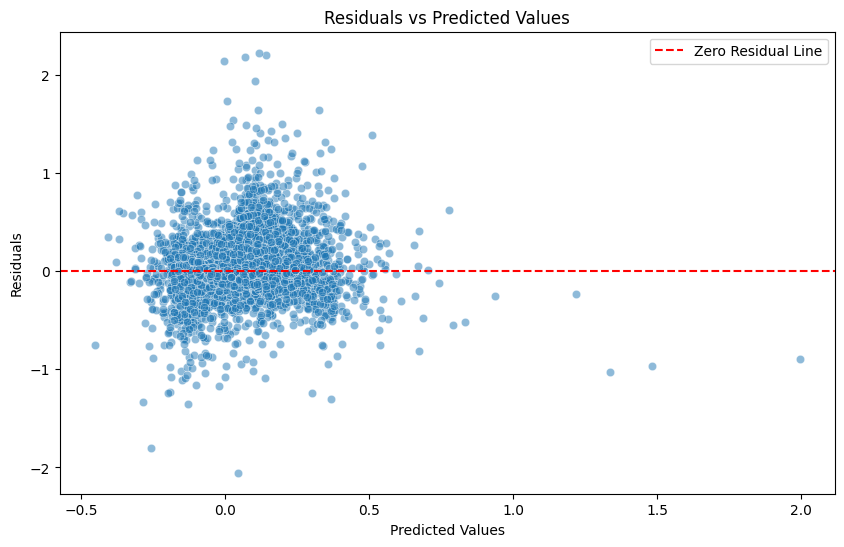

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS, add_constant

# 加载数据
df = pd.read_csv('/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/Economitics/data/merged_data_new.csv')

# 检查数据是否有缺失值
if df.isnull().sum().any():
    print("存在缺失值，清理数据中...")
    df = df.dropna()

# 定义应变量和自变量
y = df['Logreturn']  # 假设 "Logreturn" 是应变量列名
X = df[['StrategyLabel', 'TotalVolume', 'HoldDuration', 'IndexReturn', 'S_I', 'S_V', 'V_I', 'l_TotalVolume', 'l_HoldDuration']]

# 添加截距项
X = add_constant(X)

# 训练回归模型
model = OLS(y, X).fit()

# 提取残差和预测值
residuals = model.resid
predicted_values = model.fittedvalues

# 绘制残差与预测值的散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()